In [153]:
# https://www.google.com/search?q=(Weighted)+Orthogonal+Procrustes+Problem&sourceid=chrome&ie=UTF-8 and melissa work
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
import pickle
import numpy as np

In [155]:
path_to_data = r"G:\OpenData\OpenDataResults\gpfa\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1048196054--ecephys_session_1048196054\pickles\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1048196054--ecephys_session_1048196054CA1_TH_SUB_gpfa.pkl"

In [156]:
loaded = pickle.load(open(path_to_data, "rb"))
loaded["name"] = "test"

In [157]:
from trna.plot import simple_trajectory_plot, plot_gpfa_distance, plot_curves, plot_all_trajectories

In [158]:
recording_info = [loaded]
data = loaded["elephant"]
correct = data["correct"]
incorrect = data["incorrect"]

In [159]:
average_trajectory_pass = np.mean(correct, axis=0)
average_trajectory_fail = np.mean(incorrect, axis=0)

In [160]:
print(average_trajectory_pass.shape)
print(average_trajectory_fail.shape)

(3, 50)
(3, 50)


In [161]:
import similaritymeasures
from procrustes import orthogonal

def align_curves2(a, b, scale=True, translate=True):
    result = orthogonal(a, b, scale=scale, translate=translate)
    return result.new_a, result.new_b


def distance_between_curves(a, b):
    df = similaritymeasures.frechet_dist(a, b)
    return df


In [162]:
from scipy.spatial import procrustes

def align_curves(a, b):
    mtx1, mtx2, disparity = procrustes(a, b)
    return mtx1, mtx2

In [163]:
from scipy.linalg import orthogonal_procrustes

def align_curves_ortho(a, b):
    R, scale = orthogonal_procrustes(a, b)
    return np.dot(a, R), b

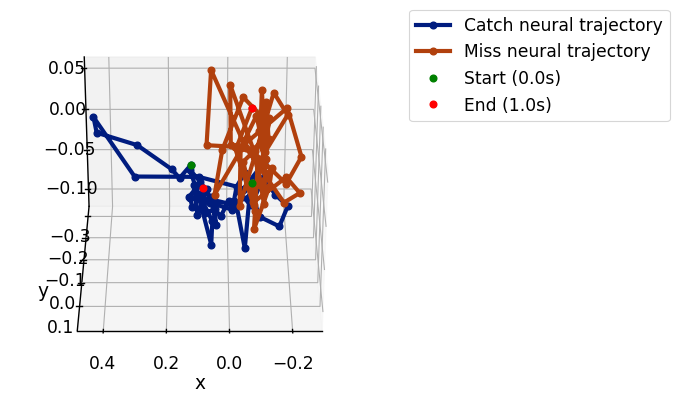

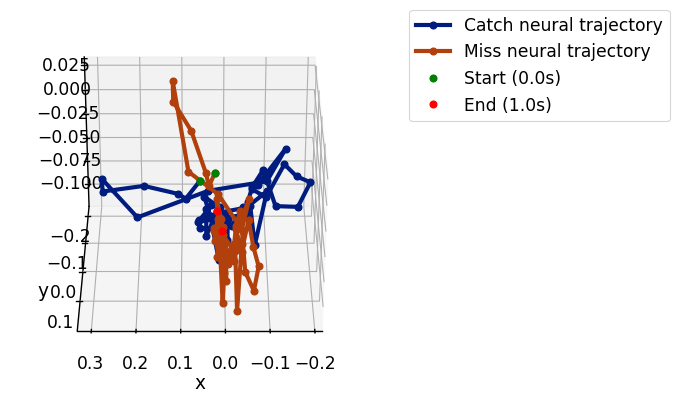

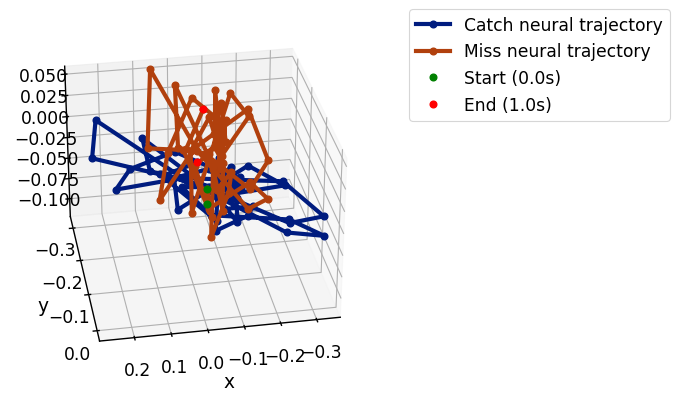

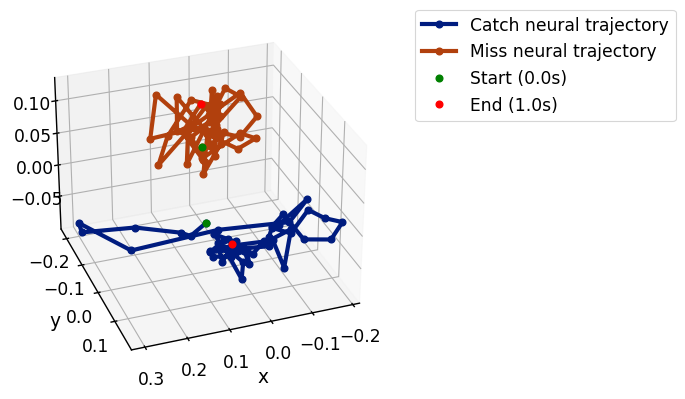

In [164]:
aligned_correct, aligned_incorrect = align_curves(average_trajectory_pass,average_trajectory_fail)
fig1 = plot_curves(average_trajectory_pass, average_trajectory_fail, azim=90, elev=30)
fig2 = plot_curves(aligned_correct, aligned_incorrect, azim=90, elev=30)
aligned_correct, aligned_incorrect = align_curves_ortho(average_trajectory_pass,average_trajectory_fail)
fig4 = plot_curves(aligned_correct, aligned_incorrect, azim=80, elev=30)
aligned_correct, aligned_incorrect = align_curves2(average_trajectory_pass,average_trajectory_fail)
fig3 = plot_curves(aligned_correct, aligned_incorrect, azim=70, elev=30)

In [169]:
from pathlib import Path
path_to_data = r"G:\OpenData\OpenDataResults\gpfa\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1048196054--ecephys_session_1048196054\pickles\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1048196054--ecephys_session_1048196054CA1_TH_SUB_gpfa.pkl"
loaded = pickle.load(open(path_to_data, "rb"))
loaded["name"] = "test"
recording_info = [loaded]
plot_gpfa_distance(recording_info, Path("test"), "test", "test")

In [167]:
path_to_data = r"G:\OpenData\OpenDataResults\gpfa\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1044385384--ecephys_session_1044385384\pickles\visual-behavior-neuropixels-0.4.0--behavior_ecephys_sessions--1044385384--ecephys_session_1044385384VISp_LGv_VISl_gpfa.pkl"
loaded = pickle.load(open(path_to_data, "rb"))
loaded["name"] = "test2"
recording_info = [loaded]
plot_gpfa_distance(recording_info, Path("test"), "r1", "blas")

0.9113962982671391
(True, True)
0.9931963818242122
(True, False)
1.0366996762418998
(False, True)
1.814493661107351
(False, False)
1.814493661107351
1.0684243340395607
0.4136879822261303


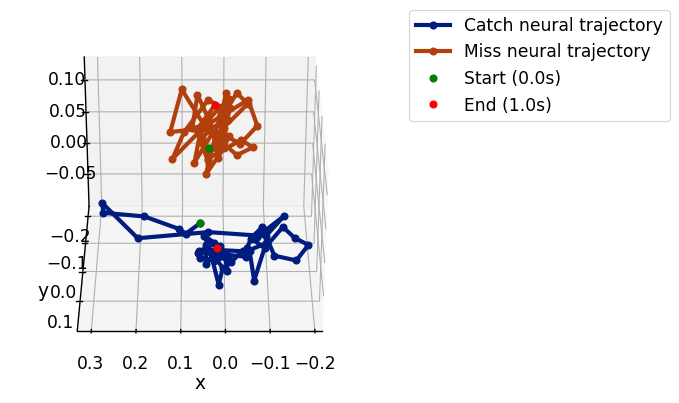

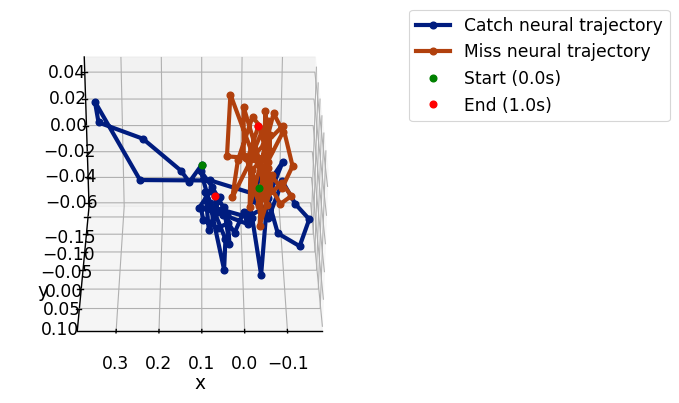

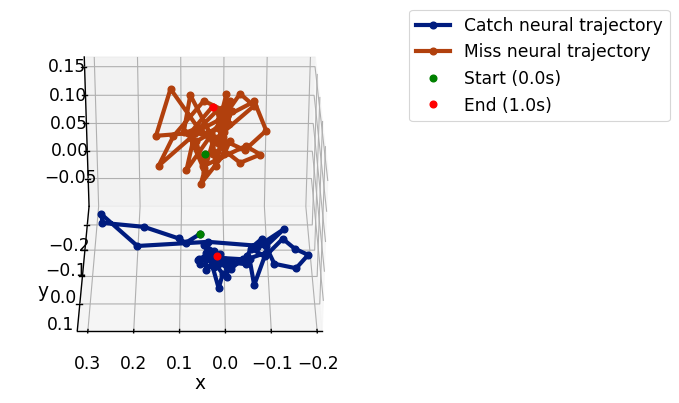

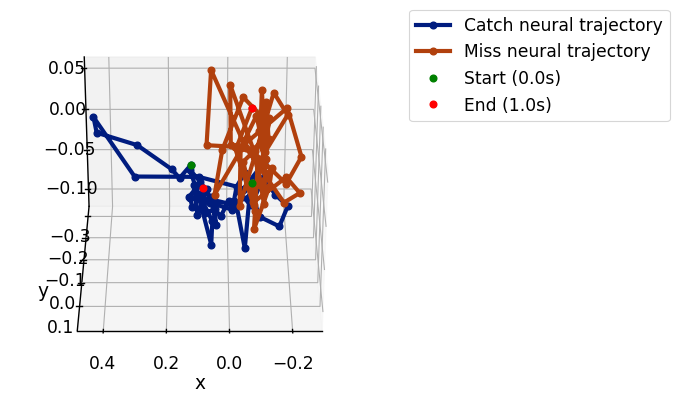

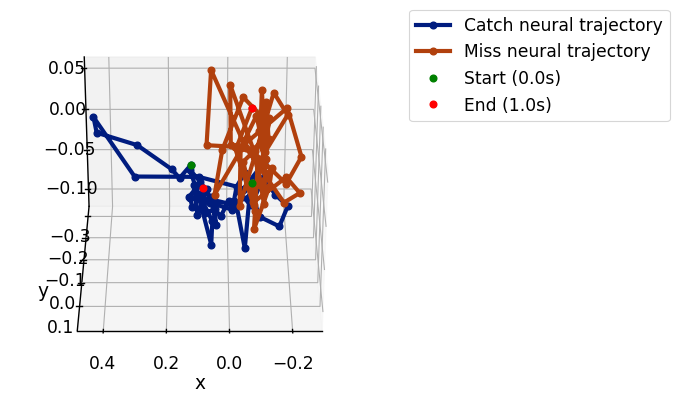

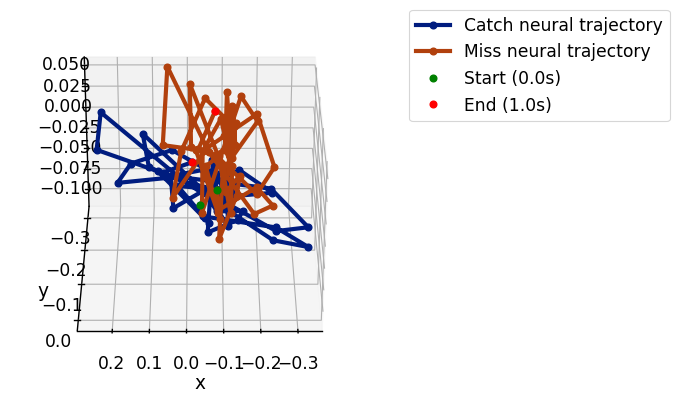

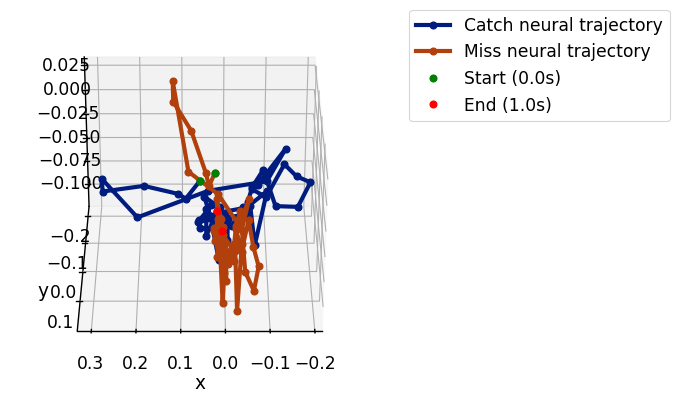

In [ ]:
scale_translate_options = [
    (True, True),
    (True, False),
    (False, True),
    (False, False),
]

for val in scale_translate_options:
    aligned_correct, aligned_incorrect = align_curves2(average_trajectory_pass,average_trajectory_fail, scale=val[0], translate=val[1])
    fig = plot_curves(aligned_correct, aligned_incorrect, azim=90, elev=30)
    fig.savefig(f"test_{val[0]}_{val[1]}.png")
    print(distance_between_curves(aligned_correct, aligned_incorrect))
    print(val)

print(distance_between_curves(average_trajectory_pass, average_trajectory_fail))
fig = plot_curves(average_trajectory_pass, average_trajectory_fail, azim=90, elev=30)
fig.savefig(f"test_original.png")

aligned_correct, aligned_incorrect = align_curves_ortho(average_trajectory_pass,average_trajectory_fail)
fig = plot_curves(aligned_correct, aligned_incorrect, azim=90, elev=30)
fig.savefig(f"test_procrustes_ortho.png")
print(distance_between_curves(aligned_correct, aligned_incorrect))

aligned_correct, aligned_incorrect = align_curves(average_trajectory_pass,average_trajectory_fail)
fig = plot_curves(aligned_correct, aligned_incorrect, azim=90, elev=30)
fig.savefig(f"test_procrustes_all.png")
print(distance_between_curves(aligned_correct, aligned_incorrect))
